In [1]:
import pandas as pd
import numpy  as np

In [2]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-03-21 12:37:31--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 2001:610:430:ffff::16:198, 131.224.250.75
Connecting to data.rivm.nl (data.rivm.nl)|2001:610:430:ffff::16:198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105275538 (100M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>] 100.40M  8.68MB/s    in 11s     

2021-03-21 12:37:43 (8.81 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [105275538/105275538]



In [3]:
df_case = pd.read_csv(
    'COVID-19_casus_landelijk.csv',
    sep=';',
    parse_dates=[0, 1],
    infer_datetime_format=True,
)
(
    df_case
    .tail(10)
)

Date_file Date_statistics Date_statistics_type Agegroup  \
1194570 2021-03-20 10:00:00      2021-03-20                  DPL    20-29   
1194571 2021-03-20 10:00:00      2021-03-20                  DPL    60-69   
1194572 2021-03-20 10:00:00      2021-03-20                  DPL    40-49   
1194573 2021-03-20 10:00:00      2021-03-20                  DPL    40-49   
1194574 2021-03-20 10:00:00      2021-03-20                  DPL    20-29   
1194575 2021-03-20 10:00:00      2021-03-20                  DON    40-49   
1194576 2021-03-20 10:00:00      2021-03-20                  DPL    50-59   
1194577 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194578 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194579 2021-03-20 10:00:00      2021-03-20                  DPL    60-69   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1194570    Male        Utrecht            Unknown  Unknown            NaN   
1194571    Male  Noord-Brabant            Unknown  Unknown            NaN   
1194572  Female        Utrecht            Unknown  Unknown            NaN   
1194573    Male   Zuid-Holland            Unknown  Unknown            NaN   
1194574    Male  Noord-Brabant            Unknown  Unknown            NaN   
1194575  Female   Zuid-Holland            Unknown  Unknown            NaN   
1194576  Female   Zuid-Holland            Unknown  Unknown            NaN   
1194577    Male        Utrecht            Unknown  Unknown            NaN   
1194578    Male  Noord-Brabant            Unknown       No            NaN   
1194579  Female  Noord-Brabant            Unknown  Unknown            NaN   

        Municipal_health_service  
1194570        GGD Regio Utrecht  
1194571    GGD Hart voor Brabant  
1194572        GGD Regio Utrecht  
1194573   GGD Rotterdam-Rijnmond  
1194574    GGD Hart voor Brabant  
1194575           GGD Haaglanden  
1194576   GGD Rotterdam-Rijnmond  
1194577        GGD Regio Utrecht  
1194578     GGD Brabant-Zuidoost  
1194579    GGD Hart voor Brabant

In [4]:
# Define period labels
df_case['period'] = (
    (
        df_case
        ['Date_statistics']
        .dt
        .isocalendar()
        .year
        * 100
    )
    +
    (
        df_case
        ['Date_statistics']
        .dt
        .isocalendar()
        .week
    )
)
df_case['period'] = (
    df_case
    ['period']
    .apply(str)
)
df_case['period'] = (
    df_case
    ['period']
    .apply(lambda x: x[:4] + 'W' + x[4:])
)
# Define group labels
df_case['groups'] = (
    (
        df_case
        ['Sex']
        + ' '
    )
    +
    (
        df_case
        ['Agegroup']
    )
)
(
    df_case
    .tail(10)
)

Date_file Date_statistics Date_statistics_type Agegroup  \
1194570 2021-03-20 10:00:00      2021-03-20                  DPL    20-29   
1194571 2021-03-20 10:00:00      2021-03-20                  DPL    60-69   
1194572 2021-03-20 10:00:00      2021-03-20                  DPL    40-49   
1194573 2021-03-20 10:00:00      2021-03-20                  DPL    40-49   
1194574 2021-03-20 10:00:00      2021-03-20                  DPL    20-29   
1194575 2021-03-20 10:00:00      2021-03-20                  DON    40-49   
1194576 2021-03-20 10:00:00      2021-03-20                  DPL    50-59   
1194577 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194578 2021-03-20 10:00:00      2021-03-20                  DPL    30-39   
1194579 2021-03-20 10:00:00      2021-03-20                  DPL    60-69   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1194570    Male        Utrecht            Unknown  Unknown            NaN   
1194571    Male  Noord-Brabant            Unknown  Unknown            NaN   
1194572  Female        Utrecht            Unknown  Unknown            NaN   
1194573    Male   Zuid-Holland            Unknown  Unknown            NaN   
1194574    Male  Noord-Brabant            Unknown  Unknown            NaN   
1194575  Female   Zuid-Holland            Unknown  Unknown            NaN   
1194576  Female   Zuid-Holland            Unknown  Unknown            NaN   
1194577    Male        Utrecht            Unknown  Unknown            NaN   
1194578    Male  Noord-Brabant            Unknown       No            NaN   
1194579  Female  Noord-Brabant            Unknown  Unknown            NaN   

        Municipal_health_service   period        groups  
1194570        GGD Regio Utrecht  2021W11    Male 20-29  
1194571    GGD Hart voor Brabant  2021W11    Male 60-69  
1194572        GGD Regio Utrecht  2021W11  Female 40-49  
1194573   GGD Rotterdam-Rijnmond  2021W11    Male 40-49  
1194574    GGD Hart voor Brabant  2021W11    Male 20-29  
1194575           GGD Haaglanden  2021W11  Female 40-49  
1194576   GGD Rotterdam-Rijnmond  2021W11  Female 50-59  
1194577        GGD Regio Utrecht  2021W11    Male 30-39  
1194578     GGD Brabant-Zuidoost  2021W11    Male 30-39  
1194579    GGD Hart voor Brabant  2021W11  Female 60-69

In [7]:
# Pivot to period rows with group columns
df_heat = (
    df_case
    [
        df_case
        ['Municipal_health_service']
        != ''
    ]
    .pivot_table(
        index='period',
        columns='groups',
        values='Date_statistics',
        aggfunc='count',
    )
    .fillna(0)
)
# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = (
#    df_heat[df_heat.columns[0:24]]
#    .sum(axis=1)
#)
df_heat = (
    df_heat
    [
        df_heat
        .columns[0:24]
    ]
    .loc['2020W09':]
#    .div(
#        df_heat['total'],
#        axis='index',
#    )
)
# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()
(
    df_heat
    .tail(5)
    .loc[::-1]
    .transpose()
)

period          2021W11  2021W10  2021W09  2021W08  2021W07
groups                                                     
Female 0-9        854.0   1362.0   1166.0   1048.0    865.0
Female 10-19     1680.0   2743.0   2242.0   2079.0   1685.0
Female 20-29     1886.0   3195.0   2945.0   2588.0   2514.0
Female 30-39     1663.0   2971.0   2519.0   2436.0   2439.0
Female 40-49     1562.0   2875.0   2401.0   2255.0   2181.0
Female 50-59     1489.0   2960.0   2574.0   2361.0   2569.0
Female 60-69      760.0   1640.0   1368.0   1436.0   1497.0
Female 70-79      479.0    911.0    802.0    880.0    907.0
Female 80-89      201.0    396.0    421.0    545.0    617.0
Female 90+         43.0    121.0    121.0    180.0    229.0
Female <50          0.0      0.0      0.0      0.0      0.0
Female Unknown      0.0      0.0      0.0      0.0      0.0
Male 0-9          916.0   1471.0   1247.0   1085.0    924.0
Male 10-19       1659.0   2948.0   2221.0   1974.0   1696.0
Male 20-29       1875.0   3301.0   2824.0   2482.0   2325.0
Male 30-39       1449.0   2607.0   2307.0   2149.0   2177.0
Male 40-49       1545.0   2813.0   2254.0   2161.0   2056.0
Male 50-59       1574.0   3204.0   2662.0   2434.0   2521.0
Male 60-69        941.0   1785.0   1623.0   1603.0   1607.0
Male 70-79        451.0    888.0    833.0    832.0    867.0
Male 80-89        160.0    319.0    300.0    365.0    449.0
Male 90+           24.0     48.0     46.0     77.0     79.0
Male <50            0.0      0.0      0.0      0.0      0.0
Male Unknown        0.0      0.0      0.0      0.0      0.0

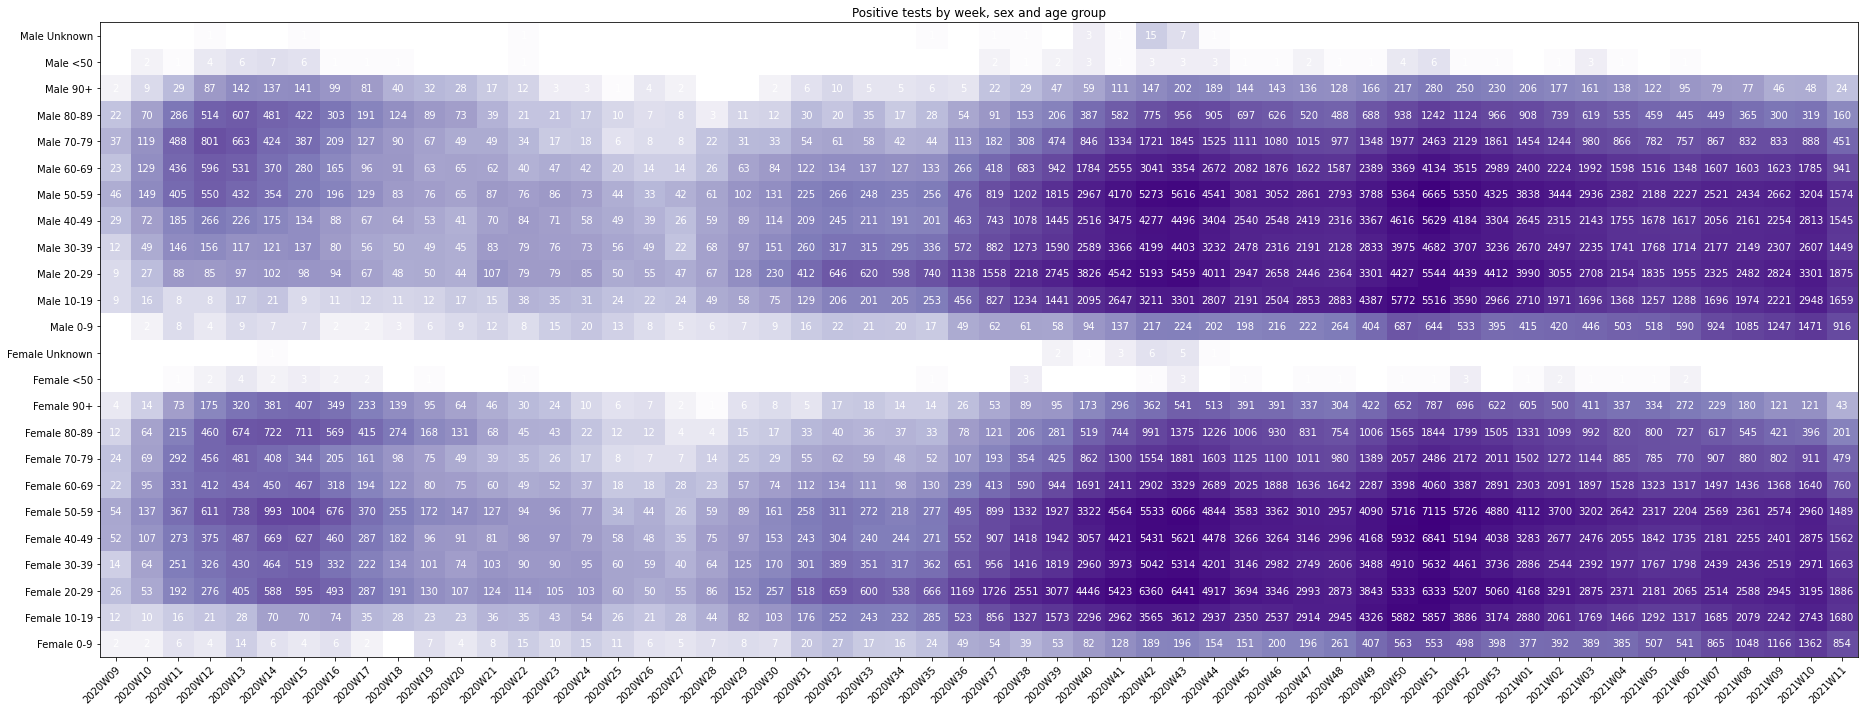

In [8]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(
    figsize=(26, 10),
)

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(
        df_heat
        [df_heat > 0]
        .loc[:]
        .transpose()
    ),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower',
)

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor",
)

# Convert dataframe to numpy format
np_heat = (
    df_heat
    .to_numpy()
)

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i, j,
            int(np_heat[i, j]),
            ha="center",
            va="center",
            color="w",
        )

ax.set_title("Positive tests by week, sex and age group")
fig.tight_layout()
plt.show()